# Facial Emotion Classifier

In [1253]:
import numpy as np  #Numpy used for numeric operations
import pandas as pd #Pandas used for data analysis
pd.set_option('display.max_columns', None) #Parâmetro para exibir todas as colunas
pd.set_option('display.max_colwidth', -1)
%matplotlib inline
import matplotlib.pyplot as plt #Matplot object to plot
import matplotlib.image as mpimg #Classic function to extract raw image from folder
import os #os operations
import math #math operations
from sklearn.svm import SVC # SVM sklearn implementation
from sklearn.ensemble import RandomForestClassifier # RandomForest sklearn implementation
from sklearn import metrics # Metrics object for calculations
from sklearn.feature_selection import RFECV # Wrapper that automatically decreases and choose best model
from sklearn.model_selection import train_test_split # Method to split into train/test data
from sklearn.model_selection import cross_val_score # Method for cross-validation and score together

# Dataset Analysis and Cleanning

The data is provided by Paula D. Paro Costa on her personal project Expressive Speech Animation: http://www.dca.fee.unicamp.br/~paula/research.html#projects

In [1254]:
df = pd.read_csv("data/imagedb_CH_disciplina.csv", header = None, sep=",")
print(df.shape)
df.head()

(897, 65)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,Em9_Fala3_0204_640x480.png,admiration,i,k,\at,k,o,\at,NaN,(303.5;319.0),(378.5;326.0),(343.5;319.5),(342.0;347.5),(334.0;315.5),(354.0;314.5),(318.5;316.5),(367.5;318.5),(317.5;338.5),(363.5;341.5),(326.5;196.5),(306.5;193.5),(279.5;203.0),(381.5;200.0),(400.0;198.5),(425.5;215.0),(327.5;237.5),(287.5;233.5),(305.5;225.5),(307.0;240.0),(373.0;240.0),(414.0;241.0),(395.5;232.0),(395.5;244.0),(343.0;238.0),(359.5;239.5),(351.0;238.5),(348.5;289.0),(324.5;285.0),(365.5;288.5),(338.0;263.0),(362.5;265.0),(350.0;264.0),(346.5;299.5),(356.0;152.0),(306.0;146.5),(406.5;155.5),(340.5;394.0),(268.0;331.5),(411.5;343.0),(294.0;371.0),(383.0;377.0),(232.0;209.0),(224.5;238.5),(248.5;287.5),(258.0;280.0),(462.0;224.5),(467.0;250.5),(436.0;300.0),(428.5;289.5),(326.5;325.0),(326.5;334.5),(345.5;327.0),(344.0;338.0),(363.5;325.5),(363.5;333.0)
1,Em9_Fala1_0220_640x480.png,admiration,\ep,u\~^,\ct,t,\ic,\ct,NaN,(317.5;328.5),(367.5;328.0),(345.0;313.0),(343.5;352.0),(335.5;312.0),(353.5;312.0),(325.5;317.5),(362.0;317.5),(326.0;345.5),(361.0;344.5),(322.0;198.5),(298.5;196.5),(272.0;205.0),(370.0;200.5),(394.0;197.5),(420.5;207.0),(322.5;231.5),(281.0;229.5),(300.5;220.0),(300.5;238.5),(370.0;230.0),(410.0;229.0),(391.0;220.5),(390.5;238.0),(337.5;231.0),(355.5;230.0),(346.5;230.5),(346.0;277.5),(321.0;277.5),(365.5;277.0),(333.0;253.0),(358.5;253.5),(345.5;253.0),(345.0;289.5),(346.5;137.0),(293.0;139.5),(395.5;140.5),(343.5;393.5),(278.0;348.0),(410.5;342.0),(298.5;376.5),(385.0;376.0),(230.0;215.0),(222.5;246.0),(245.0;289.5),(258.0;283.0),(457.5;218.5),(464.0;246.0),(439.0;295.0),(428.5;288.0),(332.5;324.0),(332.5;336.0),(344.5;321.5),(344.0;339.5),(354.0;323.5),(355.0;336.5)
2,Em9_Fala3_0147_640x480.png,admiration,i,k,\ep,\gf,NaN,\ep,NaN,(293.5;309.5),(376.0;314.5),(334.5;307.0),(325.5;338.5),(324.0;304.0),(345.5;305.5),(306.5;305.0),(361.0;307.5),(298.5;329.0),(353.0;333.0),(319.5;200.5),(293.5;189.5),(270.5;198.0),(369.0;201.5),(398.0;197.0),(417.5;208.0),(318.0;231.0),(274.5;225.5),(297.0;216.5),(296.5;235.5),(363.0;231.5),(405.5;232.5),(388.5;221.5),(386.0;241.0),(332.0;229.5),(352.0;230.5),(342.0;230.0),(339.5;277.5),(315.0;277.0),(363.0;279.0),(329.5;251.5),(352.0;253.0),(340.5;252.0),(339.5;289.5),(346.0;138.0),(290.5;139.5),(404.5;148.5),(332.0;385.5),(259.0;319.5),(410.5;328.0),(284.5;363.0),(377.5;368.5),(224.5;207.0),(219.0;236.5),(239.0;284.0),(251.0;276.5),(454.5;221.0),(461.5;248.0),(433.5;296.5),(424.0;287.0),(314.0;312.5),(311.0;330.0),(333.0;314.5),(328.5;330.0),(351.5;315.0),(351.5;325.5)
3,Em9_Fala1_0142_640x480.png,admiration,m,i,\fh,a,d,\fh1,NaN,(298.0;297.5),(378.0;302.0),(339.5;289.5),(337.5;327.5),(329.5;286.0),(349.0;285.5),(313.5;289.5),(364.0;291.0),(308.0;321.0),(364.5;323.5),(318.5;186.5),(297.5;178.5),(272.5;190.0),(371.5;188.0),(397.0;187.0),(420.5;200.5),(323.0;219.0),(278.0;217.0),(300.0;213.0),(300.5;220.0),(367.0;220.5),(406.5;222.5),(391.0;216.0),(390.0;224.5),(335.0;218.0),(357.0;218.0),(346.0;218.0),(341.5;263.0),(317.5;260.5),(365.5;260.5),(330.0;238.0),(353.0;238.0),(341.5;238.0),(340.0;274.5),(348.5;124.0),(298.0;133.0),(396.5;134.5),(339.0;373.0),(264.5;312.0),(417.5;320.0),(287.5;350.0),(392.5;350.5),(233.5;207.0),(226.5;237.5),(245.5;280.0),(258.0;272.0),(459.0;216.5),(467.0;244.5),(438.5;291.0),(428.5;280.5),(317.5;296.0),(316.5;315.5),(339.0;297.0),(339.0;319.5),(355.5;296.5),(357.0;319.5)
4,Em9_Fala2_0079_640x480.png,admiration,\zh,u,\fh,\hs,k,\fh2,NaN,(317.0;315.5),(375.0;317.0),(349.5;304.5),(347.0;334.0),(340.5;302.5),(357.5;302.0),(330.5;307.0),(368.5;307.5),(329.5;329.5),(362.5;329.5),(327.5;180.0),(306.0;179.5),(282.0;191.0),(380.5;182.5),(403.5;184.5),(426.5;199.0),(329.0;224.5),(290.0;224.5),(307.5;222.0),(307.5;231.0),(374.5;225.5),(413.0;230.5),(397.5;225.5),(394.0;233.0),(342.5;223.0),(363.0;223.

We can notice that the data needs to be processed since some columns will not be valuable and other ones needs to be reformatted such as the Points coordinates. In order to accomplish this, a function split_points was created to split the coordinates of landmarks and the index names were changed to better names representation.

In [1255]:
x_columns = pd.Series();
y_columns = pd.Series();

def split_points(column):
    for i in range(len(column)):
        x, y = column[i].split(";")
        x = x.replace("(","")
        y = y.replace(")","")
        x_columns.set_value(i, x)
        y_columns.set_value(i, y)
    return x_columns, y_columns

for c in range(9,65):
    df["x_"+str(c)], df["y_"+str(c)] = split_points(df[c])
    df.drop(c, 1, inplace=True)
    
for c in range(2,9):
    df.drop(c, 1, inplace=True)
    
df.head()

,0,1,x_9,y_9,x_10,y_10,x_11,y_11,x_12,y_12,x_13,y_13,x_14,y_14,x_15,y_15,x_16,y_16,x_17,y_17,x_18,y_18,x_19,y_19,x_20,y_20,x_21,y_21,x_22,y_22,x_23,y_23,x_24,y_24,x_25,y_25,x_26,y_26,x_27,y_27,x_28,y_28,x_29,y_29,x_30,y_30,x_31,y_31,x_32,y_32,x_33,y_33,x_34,y_34,x_35,y_35,x_36,y_36,x_37,y_37,x_38,y_38,x_39,y_39,x_40,y_40,x_41,y_41,x_42,y_42,x_43,y_43,x_44,y_44,x_45,y_45,x_46,y_46,x_47,y_47,x_48,y_48,x_49,y_49,x_50,y_50,x_51,y_51,x_52,y_52,x_53,y_53,x_54,y_54,x_55,y_55,x_56,y_56,x_57,y_57,x_58,y_58,x_59,y_59,x_60,y_60,x_61,y_61,x_62,y_62,x_63,y_63,x_64,y_64
0,Em9_Fala3_0204_640x480.png,admiration,303.5,319.0,378.5,326.0,343.5,319.5,342.0,347.5,334.0,315.5,354.0,314.5,318.5,316.5,367.5,318.5,317.5,338.5,363.5,341.5,326.5,196.5,306.5,193.5,279.5,203.0,381.5,200.0,400.0,198.5,425.5,215.0,327.5,237.5,287.5,233.5,305.5,225.5,307.0,240.0,373.0,240.0,414.0,241.0,395.5,232.0,395.5,244.0,343.0,238.0,359.5,239.5,351.0,238.5,348.5,289.0,324.5,285.0,365.5,288.5,338.0,263.0,362.5,265.0,350.0,264.0,346.5,299.5,356.0,152.0,306.0,146.5,406.5,155.5,340.5,394.0,268.0,331.5,411.5,343.0,294.0,371.0,383.0,377.0,232.0,209.0,224.5,238.5,248.5,287.5,258.0,280.0,462.0,224.5,467.0,250.5,436.0,300.0,428.5,289.5,326.5,325.0,326.5,334.5,345.5,327.0,344.0,338.0,363.5,325.5,363.5,333.0
1,Em9_Fala1_0220_640x480.png,admiration,317.5,328.5,367.5,328.0,345.0,313.0,343.5,352.0,335.5,312.0,353.5,312.0,325.5,317.5,362.0,317.5,326.0,345.5,361.0,344.5,322.0,198.5,298.5,196.5,272.0,205.0,370.0,200.5,394.0,197.5,420.5,207.0,322.5,231.5,281.0,229.5,300.5,220.0,300.5,238.5,370.0,230.0,410.0,229.0,391.0,220.5,390.5,238.0,337.5,231.0,355.5,230.0,346.5,230.5,346.0,277.5,321.0,277.5,365.5,277.0,333.0,253.0,358.5,253.5,345.5,253.0,345.0,289.5,346.5,137.0,293.0,139.5,395.5,140.5,343.5,393.5,278.0,348.0,410.5,342.0,298.5,376.5,385.0,376.0,230.0,215.0,222.5,246.0,245.0,289.5,258.0,283.0,457.5,218.5,464.0,246.0,439.0,295.0,428.5,288.0,332.5,324.0,332.5,336.0,344.5,321.5,344.0,339.5,354.0,323.5,355.0,336.5
2,Em9_Fala3_0147_640x480.png,admiration,293.5,309.5,376.0,314.5,334.5,307.0,325.5,338.5,324.0,304.0,345.5,305.5,306.5,305.0,361.0,307.5,298.5,329.0,353.0,333.0,319.5,200.5,293.5,189.5,270.5,198.0,369.0,201.5,398.0,197.0,417.5,208.0,318.0,231.0,274.5,225.5,297.0,216.5,296.5,235.5,363.0,231.5,405.5,232.5,388.5,221.5,386.0,241.0,332.0,229.5,352.0,230.5,342.0,230.0,339.5,277.5,315.0,277.0,363.0,279.0,329.5,251.5,352.0,253.0,340.5,252.0,339.5,289.5,346.0,138.0,290.5,139.5,404.5,148.5,332.0,385.5,259.0,319.5,410.5,328.0,284.5,363.0,377.5,368.5,224.5,207.0,219.0,236.5,239.0,284.0,251.0,276.5,454.5,221.0,461.5,248.0,433.5,296.5,424.0,287.0,314.0,312.5,311.0,330.0,333.0,314.5,328.5,330.0,351.5,315.0,351.5,325.5
3,Em9_Fala1_0142_640x480.png,admiration,298.0,297.5,378.0,302.0,339.5,289.5,337.5,327.5,329.5,286.0,349.0,285.5,313.5,289.5,364.0,291.0,308.0,321.0,364.5,323.5,318.5,186.5,297.5,178.5,272.5,190.0,371.5,188.0,397.0,187.0,420.5,200.5,323.0,219.0,278.0,217.0,300.0,213.0,300.5,220.0,367.0,220.5,406.5,222.5,391.0,216.0,390.0,224.5,335.0,218.0,357.0,218.0,346.0,218.0,341.5,263.0,317.5,260.5,365.5,260.5,330.0,238.0,353.0,238.0,341.5,238.0,340.0,274.5,348.5,124.0,298.0,133.0,396.5,134.5,339.0,373.0,264.5,312.0,417.5,320.0,287.5,350.0,392.5,350.5,233.5,207.0,226.5,237.5,245.5,280.0,258.0,272.0,459.0,216.5,467.0,244.5,438.5,291.0,428.5,280.5,317.5,296.0,316.5,315.5,339.0,297.0,339.0,319.5,355.5,296.5,357.0,319.5
4,Em9_Fala2_0079_640x480.png,admiration,317.0,315.5,375.0,317.0,349.5,304.5,347.0,334.0,340.5,302.5,357.5,302.0,330.5,307.0,368.5,307.5,329.5,329.5,362.5,329.5,327.5,180.0,306.0,179.5,282.0,191.0,380.5,182.5,403.5,184.5,426.5,199.0,329.0,224.5,290.0,224.5,307.5,222.0,307.5,231.0,374.5,225.5,413.0,230.5,397.5,225.5,394.0,233.0,342.5,223.0,363.0,223.0,352.5,223.0,350.0,270.5,330.0,268.5,369.0,269.5,340.5,246.5,364.5,246.5,352.5,246.5,349.5,282.5,356.0,139.5,304.5,138.5,411.5,148.5,347.5,373.0,272.5,318.5,420.0,324.0,299.0,353.5,394.5,356.5,235.0,213.5,228.5,243.5,249.0,287.0,263.5,279

 Let's check which emotions the CSV file contains (Ps: In further analysis we will discover that only some of them will be used)

In [1256]:
df[1].unique()

array(['admiration', 'anger', 'disapointment', 'disgust', 'fear',
       'fearsconfirmed', 'gloating', 'gratification', 'gratitude',
       'happyfor', 'hope', 'joy', 'love', 'neutral', 'pity', 'pride',
       'relief', 'remorse', 'reproach', 'ressentment', 'sadness',
       'satisfaction', 'shame'], dtype=object)

Checking if the dataset is balanced

In [1257]:
#Balanced Classes
df[1].value_counts()

gratification     39
ressentment       39
disgust           39
love              39
remorse           39
anger             39
fear              39
reproach          39
disapointment     39
pity              39
neutral           39
shame             39
happyfor          39
gloating          39
gratitude         39
joy               39
admiration        39
sadness           39
relief            39
hope              39
pride             39
fearsconfirmed    39
satisfaction      39
Name: 1, dtype: int64

The files inside the dataset folder provided are from just some emotions so the dataset is not complete. In order to match the pandas Dataframe with the right image files, let's filter only the names included in both first column and image files.

In [1258]:
image_filenames = os.listdir("data/")
df = df[df[0].isin(image_filenames)]
df.reset_index(drop=True, inplace=True)
print(df.shape)
df.head()

(194, 114)


,0,1,x_9,y_9,x_10,y_10,x_11,y_11,x_12,y_12,x_13,y_13,x_14,y_14,x_15,y_15,x_16,y_16,x_17,y_17,x_18,y_18,x_19,y_19,x_20,y_20,x_21,y_21,x_22,y_22,x_23,y_23,x_24,y_24,x_25,y_25,x_26,y_26,x_27,y_27,x_28,y_28,x_29,y_29,x_30,y_30,x_31,y_31,x_32,y_32,x_33,y_33,x_34,y_34,x_35,y_35,x_36,y_36,x_37,y_37,x_38,y_38,x_39,y_39,x_40,y_40,x_41,y_41,x_42,y_42,x_43,y_43,x_44,y_44,x_45,y_45,x_46,y_46,x_47,y_47,x_48,y_48,x_49,y_49,x_50,y_50,x_51,y_51,x_52,y_52,x_53,y_53,x_54,y_54,x_55,y_55,x_56,y_56,x_57,y_57,x_58,y_58,x_59,y_59,x_60,y_60,x_61,y_61,x_62,y_62,x_63,y_63,x_64,y_64
0,Em22_Fala1_0049_640x480.png,anger,302.0,328.0,370.5,331.5,340.0,315.5,337.5,368.0,330.0,312.0,350.0,312.5,314.5,317.5,362.5,319.0,308.0,357.0,362.0,359.0,323.0,211.5,297.0,205.0,272.5,209.5,371.0,213.0,393.5,208.5,420.0,218.5,320.5,238.0,280.0,232.5,300.0,224.0,299.5,242.0,367.5,239.5,408.0,239.0,389.5,228.5,388.5,246.5,333.5,240.0,353.5,239.5,343.5,239.5,343.0,285.5,316.5,285.0,364.5,287.0,330.0,261.5,356.0,261.0,343.0,261.0,341.0,298.0,349.5,146.0,297.0,145.0,400.0,151.0,337.5,408.5,263.5,337.5,409.0,339.5,288.0,382.5,382.0,385.0,228.0,214.0,219.0,242.5,243.5,290.0,254.0,286.5,453.5,227.0,459.0,254.5,428.5,302.5,422.0,296.0,318.0,323.5,316.5,356.0,338.5,322.5,337.5,358.0,359.5,323.0,357.5,351.0
1,Em22_Fala3_0041_640x480.png,anger,333.5,340.5,386.5,337.0,365.0,312.0,361.0,372.5,354.5,312.0,377.0,310.5,341.0,323.5,385.0,322.5,339.5,360.5,380.0,358.5,334.0,215.5,311.0,210.5,281.0,219.5,380.0,216.0,404.5,206.5,429.5,213.5,335.5,243.5,292.0,243.0,310.5,234.0,311.5,250.0,379.5,240.0,419.0,236.5,399.0,228.5,399.0,245.0,348.5,242.0,369.0,240.0,358.5,241.0,365.0,290.0,337.5,289.5,383.5,286.0,352.0,265.5,372.0,262.5,362.0,264.0,363.5,301.5,357.0,147.0,306.0,152.5,402.5,154.0,361.0,403.5,285.5,352.5,421.0,330.5,311.5,386.0,404.5,372.5,224.0,224.5,217.5,252.5,248.0,299.5,259.5,292.5,451.5,215.5,457.5,238.0,436.5,292.5,429.0,290.0,345.5,328.5,345.0,350.0,362.5,322.0,361.5,356.5,375.0,323.0,376.0,343.0
2,Em22_Fala1_0165_640x480.png,anger,297.5,308.0,373.0,311.5,339.0,295.0,336.5,340.5,327.5,292.0,349.0,293.0,310.5,297.0,363.5,300.0,309.5,333.5,361.5,332.5,316.0,195.5,293.5,191.5,269.0,201.0,369.5,199.0,396.0,196.0,419.0,209.5,319.5,226.5,280.0,226.5,299.5,224.0,299.5,231.5,364.0,228.5,404.0,233.0,388.5,229.0,387.0,237.0,332.0,227.0,352.0,227.5,342.0,227.0,341.0,270.5,315.0,265.5,363.5,268.5,330.0,249.0,353.0,249.0,341.5,249.0,340.5,281.5,349.0,135.5,293.5,138.5,400.5,145.5,333.5,387.0,260.0,321.5,410.5,329.0,279.5,358.0,379.5,364.0,227.0,211.0,219.5,241.5,242.5,286.0,254.0,279.5,453.0,224.5,460.0,253.0,429.0,299.0,420.5,289.5,319.0,300.0,316.0,327.5,337.0,300.5,336.5,332.0,357.0,303.0,357.5,328.5
3,Em22_Fala2_0166_640x480.png,anger,309.0,322.0,383.5,325.0,355.5,307.0,352.0,355.0,345.0,303.0,365.5,304.0,326.0,309.5,378.0,313.0,324.5,351.0,374.0,350.5,328.5,202.5,305.0,197.5,278.5,204.5,381.0,205.0,402.5,200.5,427.0,211.5,329.5,234.0,289.5,230.5,306.5,221.5,305.5,237.5,376.0,233.0,416.0,234.0,396.0,223.0,394.0,238.5,344.5,234.0,365.0,233.5,354.5,233.5,357.5,279.0,330.5,277.5,375.5,278.0,345.5,256.0,368.0,256.0,356.5,256.0,356.5,291.5,356.5,143.0,303.0,142.0,402.5,147.5,353.0,396.5,269.5,340.5,412.0,334.0,300.0,378.5,392.0,372.0,217.5,216.5,211.5,248.5,242.0,292.5,251.5,286.5,445.5,222.0,451.5,250.0,429.0,298.5,422.5,295.0,334.0,316.0,331.0,344.5,353.5,315.5,351.5,346.0,371.5,318.0,370.5,339.5
4,Em22_Fala3_0292_640x480.png,anger,317.0,331.5,381.0,333.0,352.5,319.0,350.0,358.5,341.5,316.0,362.0,316.0,329.0,321.5,371.0,322.0,329.0,349.5,370.5,350.0,329.0,210.5,307.0,206.0,282.0,210.5,379.5,209.5,404.0,207.5,427.0,218.0,330.0,239.0,287.0,233.5,309.0,226.0,307.0,243.0,375.5,238.0,417.5,237.5,398.5,227.5,396.0,246.0,345.5,240.0,364.0,241.5,354.5,240.5,353.5,287.5,329.0,285.5,372.5,287.0,343.5,264.0,366.5,265.0,355.0,264.5,353.5,298.5,356.0,148.0,310.0,148.0,407.0,156.0,352.5,400.0,272.0,342.5,412.0,345.0,297.0,377.5,390.5,380.5,230.5,217.5,222.0,245.5,247.5,292.5,259.5,287.0,455.5,226.0,461.0

The creation of a dictionary to store just the emotions to be predicted is required. Let's call it "emo_dict" and create a new column Dataframe named "Class" that transforms string emotions into integer ones.

In [1259]:
emo_dict = {}
for i in range(len(df[1].unique())):
    emo_dict[df[1].unique()[i]] = i
print(emo_dict)
df['Class'] = df[1].apply(lambda x: emo_dict[x])

{'joy': 2, 'neutral': 3, 'anger': 0, 'sadness': 4, 'fear': 1}


# Dataset Visualization

Matplotlib can be a good choice for image visualization. It also provides functions to show multiple images as a grid for better visualization as we can see below:

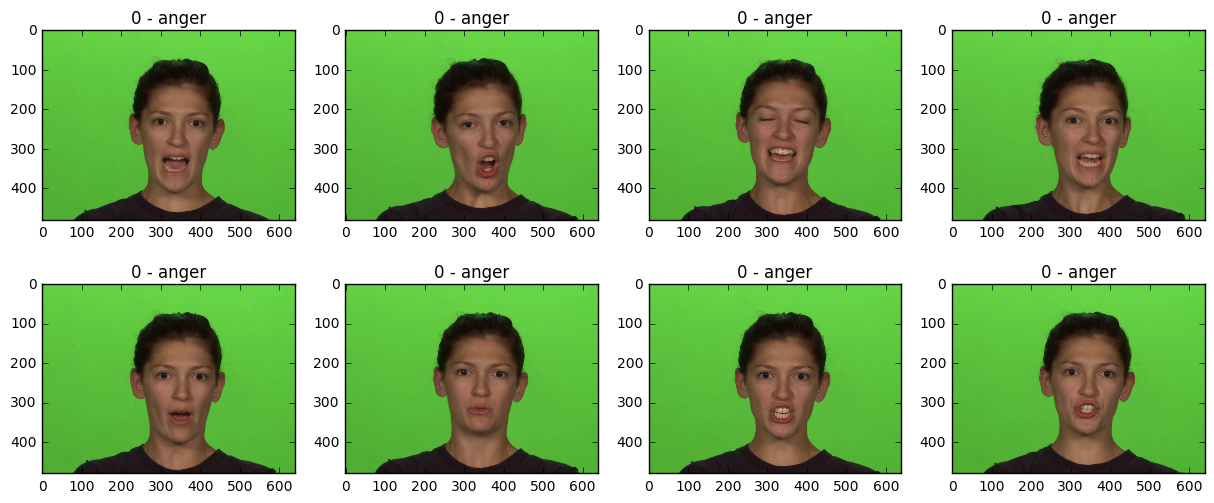

In [1260]:
fig = plt.figure(figsize=(15,6))
for i in range(8):
    if i<8:
        fig.add_subplot(2, 4, i+1)
        img=mpimg.imread('data/'+df[0][i])
        plt.imshow(img)
        plt.title(str(df["Class"][i]) + " - " + df[1][i])

#### We can also visualize an example of landmarks used in trainning data to improve understanding of the dataset.

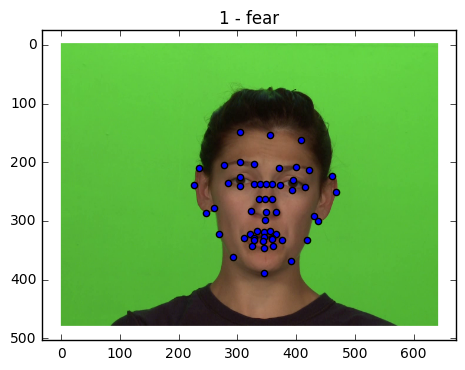

In [1261]:
img=mpimg.imread('data/'+df[0][50])
plt.imshow(img)
for i in range(9,65):
    plt.scatter(df["x_"+str(i)][50], df["y_"+str(i)][50])
plt.title(str(df["Class"][50]) + " - " + df[1][50])

# Classification Model (Approach 1)

Since we have the dataset reformatted with proper landmarks coordinates and emotion classes, a simple approach could be done by using a SVM classifier considering the raw coordinates independently. For that, Sklearn library was used with 80/20 split of train/test data:

## Linear SVM

In [1262]:
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:, 2:-1], df["Class"], test_size=0.20, random_state=42)
clf = SVC(kernel='linear', probability=True, tol=1e-3)
clf.fit(X_train, Y_train)
print("Accuracy Test: " + str(metrics.accuracy_score(Y_test, clf.predict(X_test))))

Accuracy Test: 0.948717948718


## Linear SVM using Wrapper

RFECV is a recursive wrapper with cross-validation that beginning with all features, tries to find the best model that accomplishes the desired score passed as parameter by reducing the number of features on each step. I chose this methodology rather than PCA since I could measure which are the best number of features that represents the best model. Also, the RFECV has an important consideration of analysing the entire score trainning on each step and works as a correlational approach for even independent features.

Trainning data : 155
Test data : 39
Original number of features : 112
Optimal number of features : 45
Accuracy: 0.948717948718
             precision    recall  f1-score   support

          0       1.00      0.86      0.92         7
          1       1.00      1.00      1.00         8
          2       1.00      1.00      1.00         8
          3       1.00      0.88      0.93         8
          4       0.80      1.00      0.89         8

avg / total       0.96      0.95      0.95        39



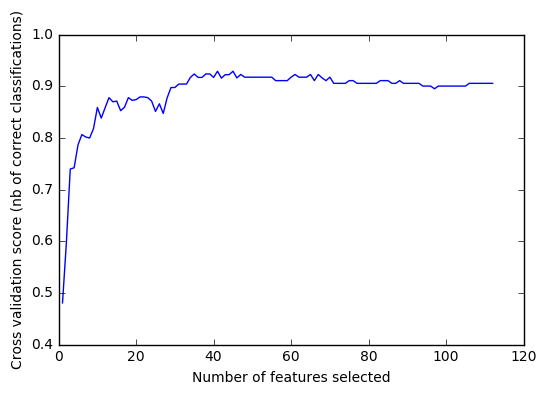

In [1263]:
clf = SVC(kernel='linear', probability=True, tol=1e-3)
rfecv = RFECV(estimator=clf, step=1, cv=10, scoring='accuracy')
print("Trainning data : %d" % X_train.shape[0])
print("Test data : %d" % X_test.shape[0])
print("Original number of features : %d" % X_train.shape[1])
rfecv.fit(X_train, Y_train)
print("Optimal number of features : %d" % rfecv.n_features_)
Y_pred = rfecv.predict(X_test)
print("Accuracy: " + str(metrics.accuracy_score(Y_test, Y_pred)))
print(metrics.classification_report(Y_test, Y_pred))

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

 The RFECV technique only improved the number of features and could not increase accuracy score, but it seems that the model stil have capacity to support a higher number of features. As we could see in the graph above, the variation after 50 features does not change considerably so an optimal number of 45 give us the same accuracy as original 112 features.

# Classification Model (Approach 2)

In this approach was used the Geometric Spatial Model of Emotions with some features extracted based on center of gravity and distance of all landmarks points based on it. The ideia was based on tutorial: http://www.paulvangent.com/2016/08/05/emotion-recognition-using-facial-landmarks/ . Having more features correlating points, the DataFrame will contains more correlated features and the classification model could improve of that.


## Feature generation 

Before talking about classification, the feature generation was done based on the function below that takes a Pandas Dataframe and returns some metrics such as:
- Mean of all x landmark points for each sample
- Mean of all y landmark points for each sample
- Distance between each landmark point and the center of gravity
- Difference between each x landmark point and x mean
- Difference between each y landmark point and y mean
- Angle related to each landmark point and the center of gravity

In [1264]:
def extract_features(dataframe):
    mean_x_list, mean_y_list, xcentral_list, ycentral_list, dist_list, angle_list= [], [], [], [], [], []
    for i in range(dataframe.shape[0]):
        x_list, y_list, xcentral, ycentral, dist, angle = [], [], [], [], [], []
        for e in dataframe.iloc[i, ::2]:
            x_list.append(float(e))
        for e in dataframe.iloc[i, 1::2]:
            y_list.append(float(e))

        xmean = np.mean(x_list)
        ymean = np.mean(y_list)

        for x, y in zip(x_list, y_list):
            xcentral.append(x - xmean)
            ycentral.append(y - ymean)
            meannp = np.asarray((ymean,xmean))
            coornp = np.asarray((y,x))
            dist.append(np.linalg.norm(coornp-meannp))
        
        for x, y in zip(xcentral, ycentral):
            angle.append(int(math.atan((y-ymean)/(x-xmean))*360/math.pi))
            
            
        xcentral_list.append(xcentral)
        ycentral_list.append(ycentral)
        dist_list.append(dist)
        angle_list.append(angle)
        mean_x_list.append(xmean)
        mean_y_list.append(ymean)
        
    return mean_x_list, mean_y_list, xcentral_list, ycentral_list, dist_list, angle_list

After extract some features from landmark points, the code below takes care of adding them to Dataframe with proper index names to better understanding. The transformed Dataframe is also showed with the shapes of each extra feature generated.

In [1265]:
df_full = df.iloc[:, 2:-1]
mean_x_list, mean_y_list, xcentral_list, ycentral_list, dist_list, angle_list = calculate_mean(df_full)
df_full["x_mean"], df_full["y_mean"], df_full["x_central"], df_full["y_central"] , df_full["dist"], df_full["angle"] = mean_x_list, mean_y_list, xcentral_list, ycentral_list, dist_list, angle_list

central_x_names = ["central_x_"+str(index+9) for index in df_full['x_central'].apply(pd.Series).columns.values]
central_y_names = ["central_y_"+str(index+9) for index in df_full['y_central'].apply(pd.Series).columns.values]
dist_names = ["dist_"+str(index+9) for index in df_full['dist'].apply(pd.Series).columns.values]
angle_names = ["angle_"+str(index+9) for index in df_full['angle'].apply(pd.Series).columns.values]
central_x_df = pd.DataFrame(df_full["x_central"].values.tolist(), columns=central_x_names)
central_y_df = pd.DataFrame(df_full["y_central"].values.tolist(), columns=central_y_names)
dist_df = pd.DataFrame(df_full["dist"].values.tolist(), columns=dist_names)
angle_df = pd.DataFrame(df_full["angle"].values.tolist(), columns=angle_names)

df_full.drop("x_central", 1, inplace=True)
df_full.drop("y_central", 1, inplace= True)
df_full.drop("dist", 1, inplace= True)
df_full.drop("angle", 1, inplace= True)

df_full.reset_index(drop=True, inplace=True)
central_x_df.reset_index(drop=True, inplace=True)
central_y_df.reset_index(drop=True, inplace=True)
dist_df.reset_index(drop=True, inplace=True)
angle_df.reset_index(drop=True, inplace=True)

df_full = pd.concat([df_full, central_x_df, central_y_df, dist_df, angle_df], axis=1)
print("Dataframe full shape = " + str(df_full.shape))
print("Dataframe central_x shape = " + str(central_x_df.shape))
print("Dataframe central_y shape = " + str(central_y_df.shape))
print("Dataframe dist shape = " + str(dist_df.shape))
print("Dataframe angle shape = " + str(angle_df.shape))
df_full.head()

Dataframe full shape = (194, 338)
Dataframe central_x shape = (194, 56)
Dataframe central_y shape = (194, 56)
Dataframe dist shape = (194, 56)
Dataframe angle shape = (194, 56)


,x_9,y_9,x_10,y_10,x_11,y_11,x_12,y_12,x_13,y_13,x_14,y_14,x_15,y_15,x_16,y_16,x_17,y_17,x_18,y_18,x_19,y_19,x_20,y_20,x_21,y_21,x_22,y_22,x_23,y_23,x_24,y_24,x_25,y_25,x_26,y_26,x_27,y_27,x_28,y_28,x_29,y_29,x_30,y_30,x_31,y_31,x_32,y_32,x_33,y_33,x_34,y_34,x_35,y_35,x_36,y_36,x_37,y_37,x_38,y_38,x_39,y_39,x_40,y_40,x_41,y_41,x_42,y_42,x_43,y_43,x_44,y_44,x_45,y_45,x_46,y_46,x_47,y_47,x_48,y_48,x_49,y_49,x_50,y_50,x_51,y_51,x_52,y_52,x_53,y_53,x_54,y_54,x_55,y_55,x_56,y_56,x_57,y_57,x_58,y_58,x_59,y_59,x_60,y_60,x_61,y_61,x_62,y_62,x_63,y_63,x_64,y_64,x_mean,y_mean,central_x_9,central_x_10,central_x_11,central_x_12,central_x_13,central_x_14,central_x_15,central_x_16,central_x_17,central_x_18,central_x_19,central_x_20,central_x_21,central_x_22,central_x_23,central_x_24,central_x_25,central_x_26,central_x_27,central_x_28,central_x_29,central_x_30,central_x_31,central_x_32,central_x_33,central_x_34,central_x_35,central_x_36,central_x_37,central_x_38,central_x_39,central_x_40,central_x_41,central_x_42,central_x_43,central_x_44,central_x_45,central_x_46,central_x_47,central_x_48,central_x_49,central_x_50,central_x_51,central_x_52,central_x_53,central_x_54,central_x_55,central_x_56,central_x_57,central_x_58,central_x_59,central_x_60,central_x_61,central_x_62,central_x_63,central_x_64,central_y_9,central_y_10,central_y_11,central_y_12,central_y_13,central_y_14,central_y_15,central_y_16,central_y_17,central_y_18,central_y_19,central_y_20,central_y_21,central_y_22,central_y_23,central_y_24,central_y_25,central_y_26,central_y_27,central_y_28,central_y_29,central_y_30,central_y_31,central_y_32,central_y_33,central_y_34,central_y_35,central_y_36,central_y_37,central_y_38,central_y_39,central_y_40,central_y_41,central_y_42,central_y_43,central_y_44,central_y_45,central_y_46,central_y_47,central_y_48,central_y_49,central_y_50,central_y_51,central_y_52,central_y_53,central_y_54,central_y_55,central_y_56,central_y_57,central_y_58,central_y_59,central_y_60,central_y_61,central_y_62,central_y_63,central_y_64,dist_9,dist_10,dist_11,dist_12,dist_13,dist_14,dist_15,dist_16,dist_17,dist_18,dist_19,dist_20,dist_21,dist_22,dist_23,dist_24,dist_25,dist_26,dist_27,dist_28,dist_29,dist_30,dist_31,dist_32,dist_33,dist_34,dist_35,dist_36,dist_37,dist_38,dist_39,dist_40,dist_41,dist_42,dist_43,dist_44,dist_45,dist_46,dist_47,dist_48,dist_49,dist_50,dist_51,dist_52,dist_53,dist_54,dist_55,dist_56,dist_57,dist_58,dist_59,dist_60,dist_61,dist_62,dist_63,dist_64,angle_9,angle_10,angle_11,angle_12,angle_13,angle_14,angle_15,angle_16,angle_17,angle_18,angle_19,angle_20,angle_21,angle_22,angle_23,angle_24,angle_25,angle_26,angle_27,angle_28,angle_29,angle_30,angle_31,angle_32,angle_33,angle_34,angle_35,angle_36,angle_37,angle_38,angle_39,angle_40,angle_41,angle_42,angle_43,angle_44,angle_45,angle_46,angle_47,angle_48,angle_49,angle_50,angle_51,angle_52,angle_53,angle_54,angle_55,angle_56,angle_57,angle_58,angle_59,angle_60,angle_61,angle_62,angle_63,angle_64
0,302.0,328.0,370.5,331.5,340.0,315.5,337.5,368.0,330.0,312.0,350.0,312.5,314.5,317.5,362.5,319.0,308.0,357.0,362.0,359.0,323.0,211.5,297.0,205.0,272.5,209.5,371.0,213.0,393.5,208.5,420.0,218.5,320.5,238.0,280.0,232.5,300.0,224.0,299.5,242.0,367.5,239.5,408.0,239.0,389.5,228.5,388.5,246.5,333.5,240.0,353.5,239.5,343.5,239.5,343.0,285.5,316.5,285.0,364.5,287.0,330.0,261.5,356.0,261.0,343.0,261.0,341.0,298.0,349.5,146.0,297.0,145.0,400.0,151.0,337.5,408.5,263.5,337.5,409.0,339.5,288.0,382.5,382.0,385.0,228.0,214.0,219.0,242.5,243.5,290.0,254.0,286.5,453.5,227.0,459.0,254.5,428.5,302.5,422.0,296.0,318.0,323.5,316.5,356.0,338.5,322.5,337.5,358.0,359.5,323.0,357.5,351.0,340.955357,278.142857,-38.955357,29.544643,-0.955357,-3.455357,-10.955357,9.044643,-26.455357,21.544643,-32.955357,21.044643,-17.955357,-43.955357,-68.455357,30.044643,52.544643,79.044643,-20.455357,-60.955357,-40.955357,-41.455357,26.544643,67.044643,48.544643,47.544643,-7.455357,12.544643,2.544643,2.044643,-24.455357,23.544643,-10.955357,15.0446

# Linear SVM using Wrapper

Let's try the SVM model with more features:

Trainning data : 155
Test data : 39
Original number of features : 338
Optimal number of features : 124
0.948717948718
             precision    recall  f1-score   support

          0       1.00      0.86      0.92         7
          1       1.00      1.00      1.00         8
          2       1.00      1.00      1.00         8
          3       1.00      0.88      0.93         8
          4       0.80      1.00      0.89         8

avg / total       0.96      0.95      0.95        39



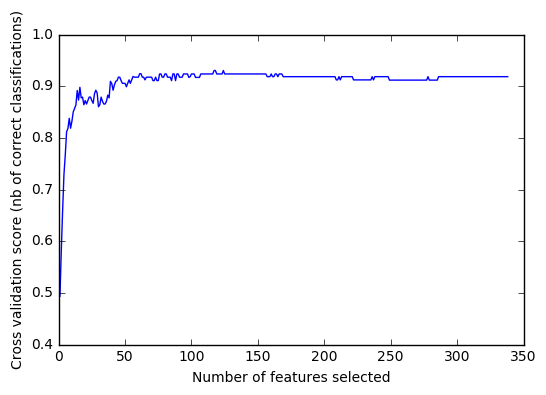

In [1266]:
X_train, X_test, Y_train, Y_test = train_test_split(df_full, df["Class"], test_size=0.20, random_state=42)

clf = SVC(kernel='linear', probability=True, tol=1e-3)
rfecv = RFECV(estimator=clf, step=1, cv=10, scoring='accuracy')
print("Trainning data : %d" % X_train.shape[0])
print("Test data : %d" % X_test.shape[0])
print("Original number of features : %d" % X_train.shape[1])
rfecv.fit(X_train, Y_train)
print("Optimal number of features : %d" % rfecv.n_features_)
Y_pred = rfecv.predict(X_test)
print(metrics.accuracy_score(Y_test, Y_pred))
print(metrics.classification_report(Y_test, Y_pred))

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

It seems that RFECV is only helping to decrease the number of features but the accuracy still remains the same. I guess that the cross-validation is choosing a model that is good during trainning and has few features, but can't improve without parameters optimization.

Note that this is also a good model since it can predict new data using few features but I'm particularly interested in improving accuracy because the SVM model has a fast trainning using this dataset.

# SVM with GridSearchCV

This model is based on finding the best parameters using GridSearch and also avoid overfitting using cross-validation.
SVM will be again the choice of classifier due to it's good optimization, fast trainning for large number of features and reduced number of samples.

In [1267]:
from sklearn.model_selection import GridSearchCV
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['linear', 'rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5, "auto"], 
                     'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100], 'probability': [True, False]}]

clf = GridSearchCV(SVC(), tuned_parameters, cv=5)
clf.fit(X_train, Y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()

Y_pred = clf.predict(X_test)
print("Accuracy: " + str(metrics.accuracy_score(Y_test, Y_pred)))
print()
print(metrics.classification_report(Y_test, Y_pred))

Best parameters set found on development set:

{'kernel': 'rbf', 'probability': True, 'C': 100, 'gamma': 1e-05}

Accuracy: 0.974358974359

             precision    recall  f1-score   support

          0       1.00      0.86      0.92         7
          1       0.89      1.00      0.94         8
          2       1.00      1.00      1.00         8
          3       1.00      1.00      1.00         8
          4       1.00      1.00      1.00         8

avg / total       0.98      0.97      0.97        39



### The final accuracy of emotion classification was 0.974 which is a good result using only geometric features and a single model. In order to improve this result, an emsemble method with more models could be used and maybe some data augmentation.